# Notes

This assignment is partially autograded. Problems 2 and 3 are graded manually according to the following rules:

- **1 point**: attempt was made, but solution is not correct,
- **2 points**: solution is generally correct, but is not efficient/has unreasonably low performance,
- **3 points**: solution is correct, is efficient/has reasonably high performance.

Problem 1 is auto-graded.

In [481]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [482]:
plt.rcParams["figure.figsize"] = (6,6)

In [483]:
import numpy as np
import torch
from sklearn import datasets

In [0]:
STUDENT = "Samuel Guedj"
ASSIGNMENT = 3
TEST = False

In [0]:
if TEST:
    import solutions
    total_grade = 0
    MAX_POINTS = 6

# Gradients

### 1. Generate gradient (1 point).

For 2-dimensional tensor `tr`, calculate a gradient of $\sum\log tr_{ij}$. Note, that you're provided with dimensions and interval:

- `dims` is a tuple, so that `tr.size()` equals `dims`,
- `lims` is an interval, so that `tr` elements are integeres, uniformly sampled from `[lims[0], lims[1])` interval (note, that lims[1] is **not** included).

Result must be a tensor of the same shape as `tr`, containing gradients of the following function:

$$\sum_{ij}\log tr_{ij}.$$

Result **will be tested against multiple random combinations of input tensor dimensions ($10 \leq n < 100 $) and sampling interval (`lims[0]=1`, `10 <= lims[1] < 100`)**.

In [666]:
def generate_grad(dims, lims):
    """Generate gradient of `log(x)`."""
    tr = torch.randint(lims[0], lims[1], size=dims, dtype=torch.float, requires_grad=True)
    res = tr.log().sum()
    res.backward()
    return tr.grad


#print(generate_grad((3,3),[1,50]))

In [0]:
PROBLEM_ID = 1

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, generate_grad)

### 2. Find a minimum (2 points, manually graded).

Consider the following scalar function:

$$
f(x) = ax^2 + bx + c
$$

Given the $a,b,c$, find $x$, which minimizes $f'(x)$. Note this:

- $a,b,c$ are fixed, and generated in such a way, that minimum always exists ($f(x)$ is convex),
- $x$ is a scalar value, i.e. 0-dimensional tensor.

In [610]:
def generate_coeffs():
    a = torch.rand(size=()) * 10
    b = -10 + torch.rand(size=()) * 10
    c = -10 + torch.rand(size=()) * 10
    return a, b, c

def func(x, a, b, c):
    return x.pow(2) * a + x * b + c

In [611]:
EPOCHS = 20
LR = 1e-2
STARTING_VAL = 1.
#STARTING_VAL = 51. # Consider choosing different starting values for x to speed-up the optimization

# Initialize x, a, b, c
#x = None
x = torch.tensor(STARTING_VAL, requires_grad=True)

a, b, c = generate_coeffs()

#print("a:{}, b:{}, c:{}".format(a, b, c))
# Collect f(x) values during training for visuzalition later on
f_vals = []
#print(f_vals)

for i in range(EPOCHS):
    # Your code goes here
    res = func(x, a, b, c)
    res.backward()
    f_vals.append(res.item())
    with torch.no_grad():
        x.sub_(LR * x.grad)  
    x.grad.zero_()

#print(f_vals)

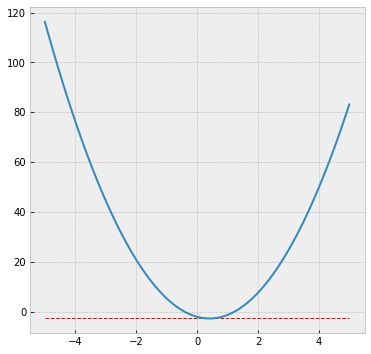

In [612]:
if f_vals:
    grid = np.linspace(-5, 5, 100)
    plt.plot(grid, np.square(grid) * a.item() + grid * b.item() + c.item())
    plt.hlines(f_vals[-1], -5, 5, "firebrick", "--", linewidth=1)

In [543]:
PROBLEM_ID = 2
GRADE = 0

if TEST:
    total_grade += GRADE

NameError: name 'TEST' is not defined

### 3. Simple neural network model (3 points, manually graded).

Construct non-linear model for binary classification. Use logistic regressions example from class as a blueprint. Experiment with different number of intermediate layers and their sizes to achieve good performance.

For a reference, imagine a neural network with a single hidden layer with $N$ neurons. Then, input $X$ is first transformed as:

$$
X^{hidden}_{ik} = \sigma(X_{ij}W^{hidden}_{jk} + b^{hidden}_k),
$$
$$
\hat y_{i} = \sigma(X^{hidden}_{ij}W_{j} + b).
$$

After this, $X^{hidden}_{ik}$ can be considered as an input to the same logistic regression model we had in class. The bonus is that we performed non-linear transformation of pur original coordinates and can now catch non-linear decision boundary (as is the case for our mock data).

Note also, that $X$ has shape $(N, 2)$ (where $N$ is number of training examples), $W^{hidden}_{jk}$ has shape of $(2, N^{hidden})$ and $b^{hidden}_k$ has shape $(N^{hidden})$. At the same time, $W$ has shape $(N^{hidden},)$ and $b$ is a scalar (the same way it was for logistic regression). This model can be considered as a logistic regression on transformed coordinates, but we learn the transformation itself.

There may be multiple hidden layers, but start from a single one.

In [469]:

N_LAYERS = 2
N_HIDDEN = (8, 2)
EPOCHS = 70000
LR = 0.3
DELTA = 1e-20
# loss = 0.11672648042440414

# N_LAYERS = 2
# N_HIDDEN = (8, 3)
# EPOCHS = 70000
# LR = 0.3
# DELTA = 1e-20
# loss = 0.12047321349382

# N_LAYERS = 2
# N_HIDDEN = (8, 4)
# EPOCHS = 70000
# LR = 0.4
# DELTA = 1e-20
# loss = 0.12434753775596619

# N_LAYERS = 1
# N_HIDDEN = (10,)
# EPOCHS = 70000
# LR = 0.5
# DELTA = 1e-20
# loss = 0.126751109957695

# N_LAYERS = 1
# N_HIDDEN = (2,)
# check those parameters

# N_LAYERS = 2
# N_HIDDEN = (8, 2)
# EPOCHS = 70000
# LR = 0.5
# DELTA = 1e-20
#loss = 0.13308225572109222

# N_LAYERS = 2
# N_HIDDEN = (7, 2)
# EPOCHS = 70000
# LR = 0.5
# DELTA = 1e-20
# loss = 0.13754405081272125

# N_LAYERS = 1
# N_HIDDEN = (10,)
# EPOCHS = 70000
# LR = 0.3
# DELTA = 1e-16
# loss = 0.1354341208934784

In [470]:
X, y = datasets.make_moons(1000, noise=.25)

In [471]:
Xt = torch.tensor(X, dtype=torch.float)
yt = torch.tensor(np.expand_dims(y, axis=-1), dtype=torch.float)

In [472]:
weights = []
biases = []
for i in range(N_LAYERS):
    # Initialize w and b for layer i with number of "neurons" of N_HIDDEN[i]
    if i == 0:
        w = torch.rand(size=(2, N_HIDDEN[i]), requires_grad=True)
    else:
        w = torch.rand(size=(N_HIDDEN[i-1], N_HIDDEN[i]), requires_grad=True)
    b = torch.rand(size=(), requires_grad=True) # None <- your code goes here
    print(w.shape)
    weights.append(w)
    biases.append(b)
w = torch.rand(size=(N_HIDDEN[i], 1), requires_grad=True)
b = torch.rand(size=(), requires_grad=True)
weights.append(w)
biases.append(b)
print(len(weights))


torch.Size([2, 8])
torch.Size([8, 2])
3


In [473]:
def sigmoid(a):
    """Sigmoid activation function."""
    return 1/(1 + (-a).exp())

def output(X, weights, biases):
    """Calculate neural network output."""

    Xi = X.clone().detach()
    for i in range(N_LAYERS+1):
      #print("shape Xi:{}, weights:{}, i:{}".format(Xi.shape, weights[i].shape, i))
      Xi = sigmoid(torch.mm(Xi, weights[i]) + biases[i])
    return Xi


def logloss(y, y_pred):
    return -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()

In [478]:
# EPOCHS = 70000
# LR = 0.6
# DELTA = 1e-20

#loss = 0.1300828903913498
#LR = 8e-1
#DELTA = 0.00001
#DELTA = 0.0000000001
loss_history = []

print("Xt.shape:{}".format(Xt.shape))
print("yt.shape:{}".format(yt.shape))
for i in range(EPOCHS):
    y_pred = output(Xt, weights, biases)
    loss = logloss(yt, y_pred)
    loss.backward()
    loss_history.append(loss.item())

    with torch.no_grad():
        for j in range(N_LAYERS+1):
            weights[j].sub_(LR * weights[j].grad)
            biases[j].sub_(LR * biases[j].grad)

    for k in range(N_LAYERS+1):
        weights[k].grad.zero_()
        biases[k].grad.zero_()

    if i % 1000 == 0:
        print(f"Epoch {i}: loss = {loss_history[-1]}")

    try:
        if loss_history[-2] - loss_history[-1] < DELTA:
            print("going out because of delta {}, {}, delta:{}".format(loss_history[-2], loss_history[-1], DELTA))
            break
    except:
        pass
  

accuracy = (yt == (y_pred > .5)).type(torch.float).mean().mul(100)

# threshold = 0.5
# ones = torch.ones_like(y_pred)
# zeros = torch.zeros_like(y_pred)
# my_pred = torch.where(y_pred > threshold, ones, zeros)
# accuracy =  100 - (my_pred.sub(yt).abs().mean() * 100)

#my_pred1 = [1 if pred > threshold else 0 for pred in y_pred]
#accuracy1 = np.array([1 if pred == fact else 0 for pred, fact in zip(my_pred1, y)]).mean()


print("accuracy:{}".format(accuracy))
print(f"loss = {loss_history[-1]}")

#print("y_pred:{}".format(y))

Xt.shape:torch.Size([1000, 2])
yt.shape:torch.Size([1000, 1])
Epoch 0: loss = 0.11709533631801605
going out because of delta 0.11705773323774338, 0.11705773323774338, delta:1e-20
accuracy:95.30000305175781
loss = 0.11705773323774338


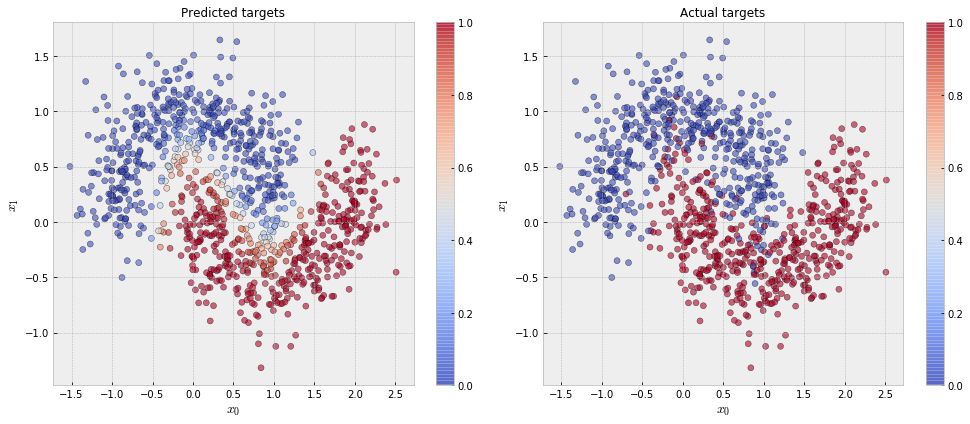

In [465]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter( X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [0]:
PROBLEM_ID = 3
GRADE = 0

if TEST:
    total_grade += GRADE

In [0]:
if TEST:
    print(f"{STUDENT}: {int(100 * total_grade / MAX_POINTS)}")